In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [8]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
print(diabetes.DESCR)  # Description of the dataset
print(diabetes.feature_names)  # List of feature names


# Your data is in diabetes.data and diabetes.target
X = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

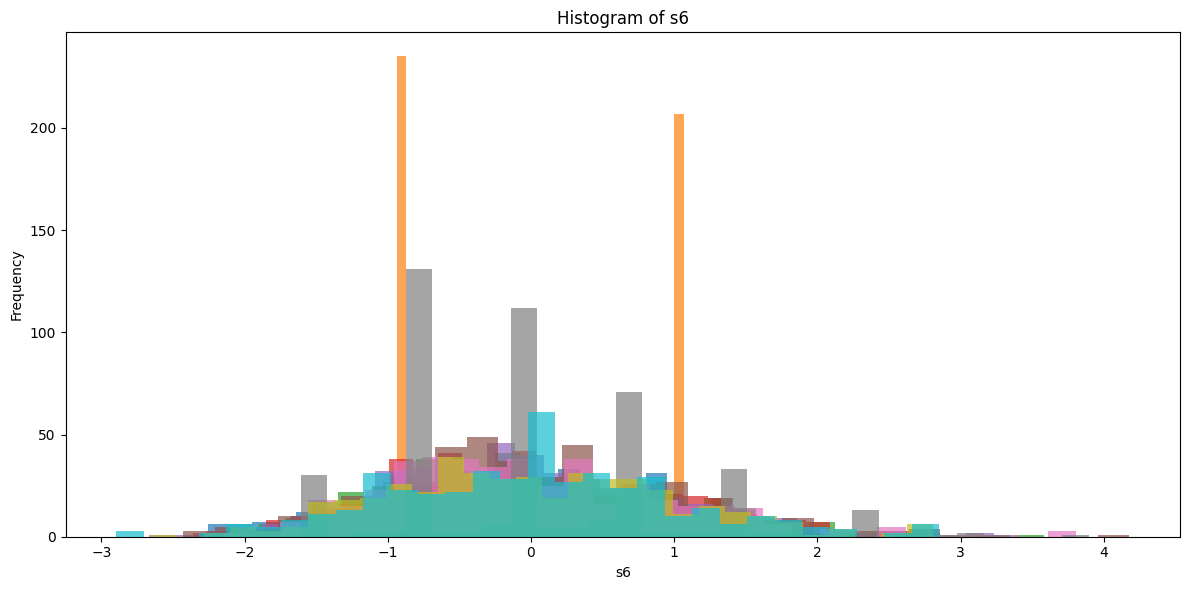

In [13]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(diabetes.feature_names):
    plt.hist(X_scaled[:, i], bins=30, alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

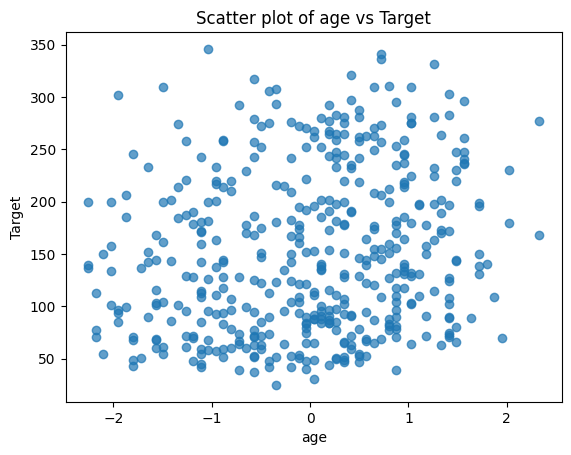

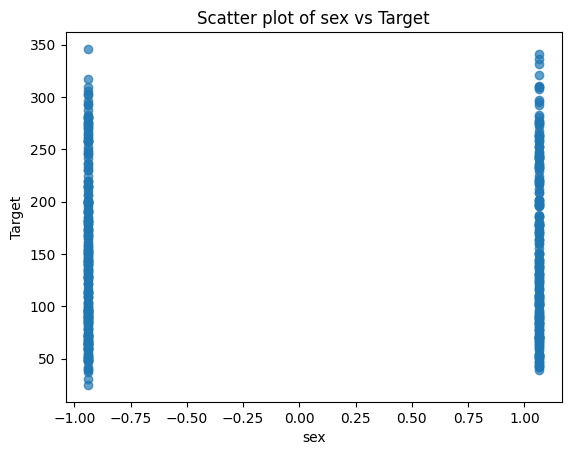

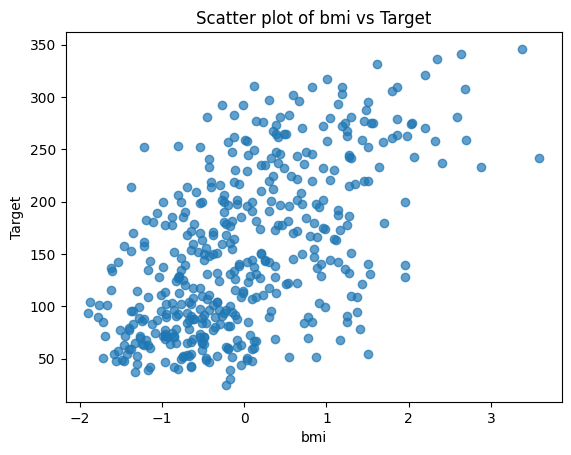

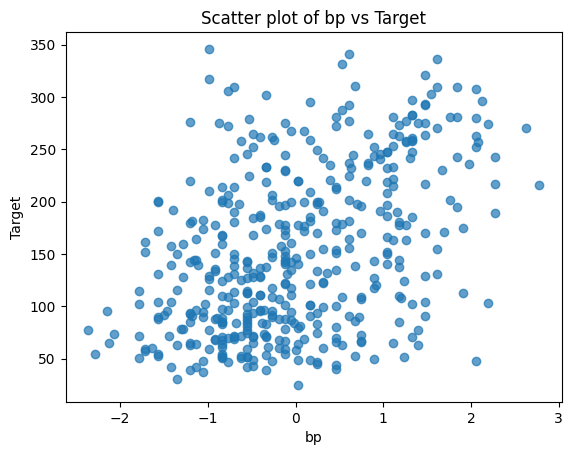

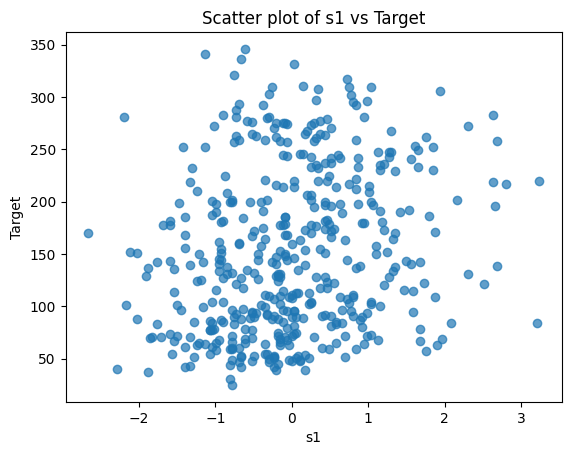

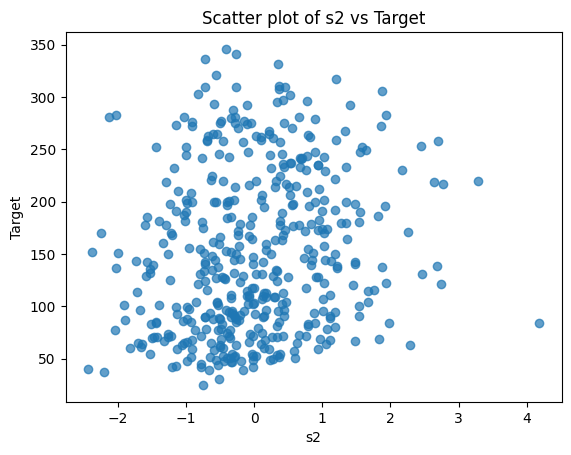

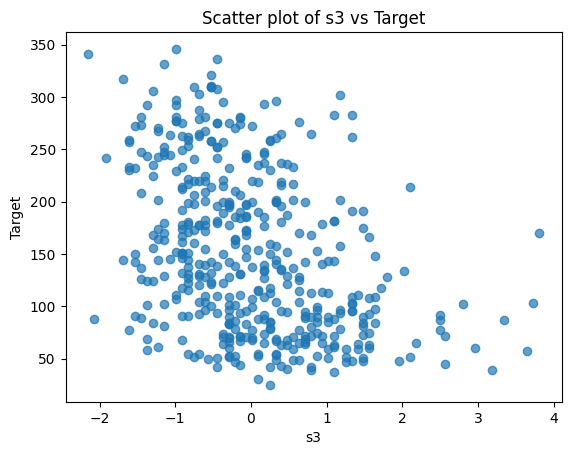

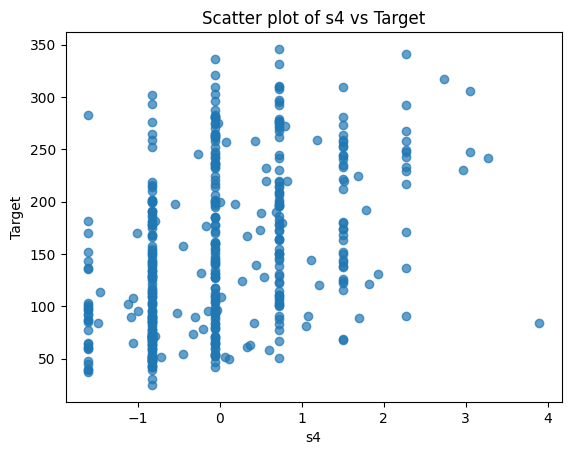

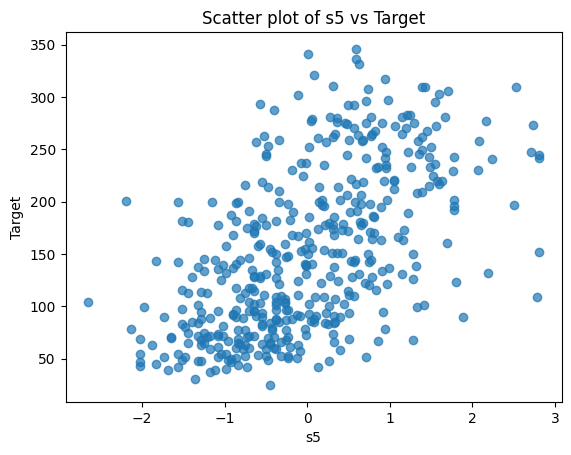

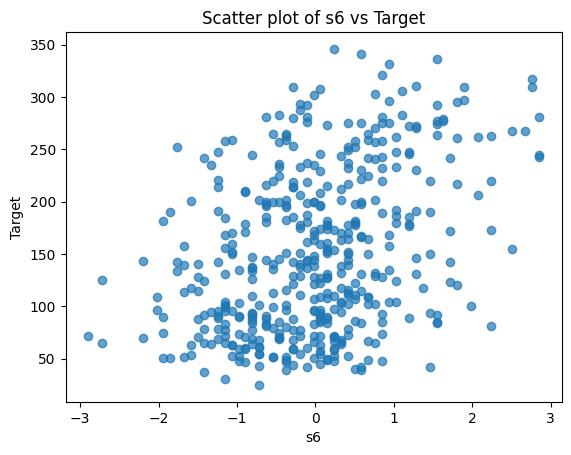

In [14]:
for i, feature in enumerate(diabetes.feature_names):
    plt.scatter(X_scaled[:, i], y, alpha=0.7)
    plt.title(f'Scatter plot of {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()

In [15]:
mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
mlp.fit(X_train, y_train)

C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)

In [18]:
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 3464.5965644700755
R-squared Score: 0.34607449372507915


In [19]:
# Experiment 1: Increase hidden layer size
mlp_large = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
mlp_large.fit(X_train, y_train)
y_pred_large = mlp_large.predict(X_test)
mse_large = mean_squared_error(y_test, y_pred_large)
r2_large = r2_score(y_test, y_pred_large)
print(f'MLP with larger hidden layer: MSE={mse_large}, R-squared={r2_large}')

# Experiment 2: Add second hidden layer
mlp_two_layers = MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', max_iter=1000)
mlp_two_layers.fit(X_train, y_train)
y_pred_two = mlp_two_layers.predict(X_test)
mse_two = mean_squared_error(y_test, y_pred_two)
r2_two = r2_score(y_test, y_pred_two)
print(f'MLP with two hidden layers: MSE={mse_two}, R-squared={r2_two}')

# Experiment 3: Change activation function
mlp_sigmoid = MLPRegressor(hidden_layer_sizes=(50,), activation='logistic', solver='adam', max_iter=1000)
mlp_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = mlp_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)
print(f'MLP with sigmoid activation: MSE={mse_sigmoid}, R-squared={r2_sigmoid}')


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with larger hidden layer: MSE=2920.5486636315986, R-squared=0.44876085052692083


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with two hidden layers: MSE=2756.8533620990434, R-squared=0.47965753097371766
MLP with sigmoid activation: MSE=8162.844361797952, R-squared=-0.5406965955785279


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
